In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "jsmaxcorr",
    "jsmincorr",
    "pearsonmaxcorr",
    "pearsonmincorr",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/belinkov/contextual-corr-analysis/attn_fine_results2_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_heads_d = {}
for network in network_l:
    num_heads_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

In [4]:
network_l

['xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_0',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_1',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_2',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_3',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_4',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_5',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_6',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_7',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_8',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_9',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_10',
 'xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_11',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_0',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_1',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_2',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_3',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_4',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_5',
 'xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_6',
 'xlnet_base_cased-ptb_p

# DataFrames

In [5]:
maxcorr_df = pd.DataFrame(res_d["maxcorr"]["similarities"])
maxcorr_df = maxcorr_df.reindex(maxcorr_df.columns)

In [6]:
mincorr_df = pd.DataFrame(res_d["mincorr"]["similarities"])
mincorr_df = mincorr_df.reindex(mincorr_df.columns)

In [7]:
jsmaxcorr_df = pd.DataFrame(res_d["jsmaxcorr"]["similarities"])
jsmaxcorr_df = jsmaxcorr_df.reindex(jsmaxcorr_df.columns)

In [8]:
jsmaxcorr_df["xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_0"]

xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_0          NaN
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_1     0.855452
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_2     0.855419
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_3     0.842590
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_4     0.785381
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_5     0.797654
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_6     0.807726
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_7     0.806186
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_8     0.734187
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_9     0.716555
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_10    0.740750
xlnet_base_cased-ptb_pos_dev_attn_unfine.hdf5_11    0.722614
xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_0       0.964258
xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_1       0.825811
xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_2       0.836904
xlnet_base_cased-ptb_pos_dev_attn_mnli.hdf5_3       0.799327
xlnet_base_cased-ptb_pos

In [9]:
jsmincorr_df = pd.DataFrame(res_d["jsmincorr"]["similarities"])
jsmincorr_df = jsmincorr_df.reindex(jsmincorr_df.columns)

In [10]:
pearsonmaxcorr_df = pd.DataFrame(res_d["pearsonmaxcorr"]["similarities"])
pearsonmaxcorr_df = pearsonmaxcorr_df.reindex(pearsonmaxcorr_df.columns)

In [11]:
pearsonmincorr_df = pd.DataFrame(res_d["pearsonmincorr"]["similarities"])
pearsonmincorr_df = pearsonmincorr_df.reindex(pearsonmincorr_df.columns)

# Heatmaps

In [12]:
short_labels = [label.split('_')[0] + ' ' + label.split('_')[-2].rstrip('.hdf5') + ' ' + label.split('_')[-1] for label in network_l]
print(short_labels)

['xlnet unfine 0', 'xlnet unfine 1', 'xlnet unfine 2', 'xlnet unfine 3', 'xlnet unfine 4', 'xlnet unfine 5', 'xlnet unfine 6', 'xlnet unfine 7', 'xlnet unfine 8', 'xlnet unfine 9', 'xlnet unfine 10', 'xlnet unfine 11', 'xlnet mnli 0', 'xlnet mnli 1', 'xlnet mnli 2', 'xlnet mnli 3', 'xlnet mnli 4', 'xlnet mnli 5', 'xlnet mnli 6', 'xlnet mnli 7', 'xlnet mnli 8', 'xlnet mnli 9', 'xlnet mnli 10', 'xlnet mnli 11', 'xlnet qnli 0', 'xlnet qnli 1', 'xlnet qnli 2', 'xlnet qnli 3', 'xlnet qnli 4', 'xlnet qnli 5', 'xlnet qnli 6', 'xlnet qnli 7', 'xlnet qnli 8', 'xlnet qnli 9', 'xlnet qnli 10', 'xlnet qnli 11', 'xlnet qqp 0', 'xlnet qqp 1', 'xlnet qqp 2', 'xlnet qqp 3', 'xlnet qqp 4', 'xlnet qqp 5', 'xlnet qqp 6', 'xlnet qqp 7', 'xlnet qqp 8', 'xlnet qqp 9', 'xlnet qqp 10', 'xlnet qqp 11', 'xlnet sst-2 0', 'xlnet sst-2 1', 'xlnet sst-2 2', 'xlnet sst-2 3', 'xlnet sst-2 4', 'xlnet sst-2 5', 'xlnet sst-2 6', 'xlnet sst-2 7', 'xlnet sst-2 8', 'xlnet sst-2 9', 'xlnet sst-2 10', 'xlnet sst-2 11']


### MaxCorr, MinCorr

In [13]:
plt.rcParams["figure.figsize"] = (20,15)

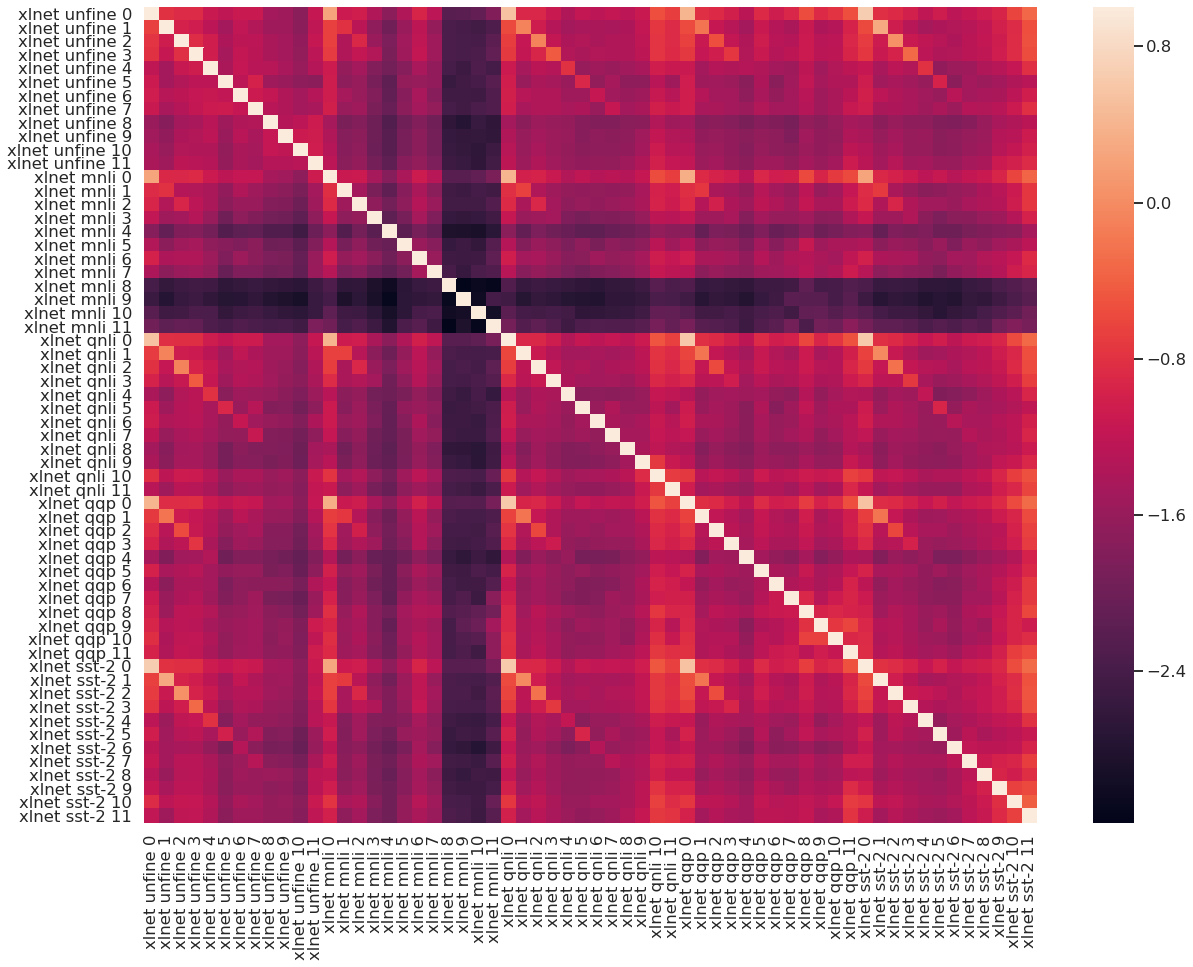

In [14]:
g = sns.heatmap(maxcorr_df.fillna(1), xticklabels=short_labels, yticklabels=short_labels) #, vmin=0, vmax=1)
g.get_figure().savefig('xlnet-attn-maxcorr-heatmap-finetuned.pdf')

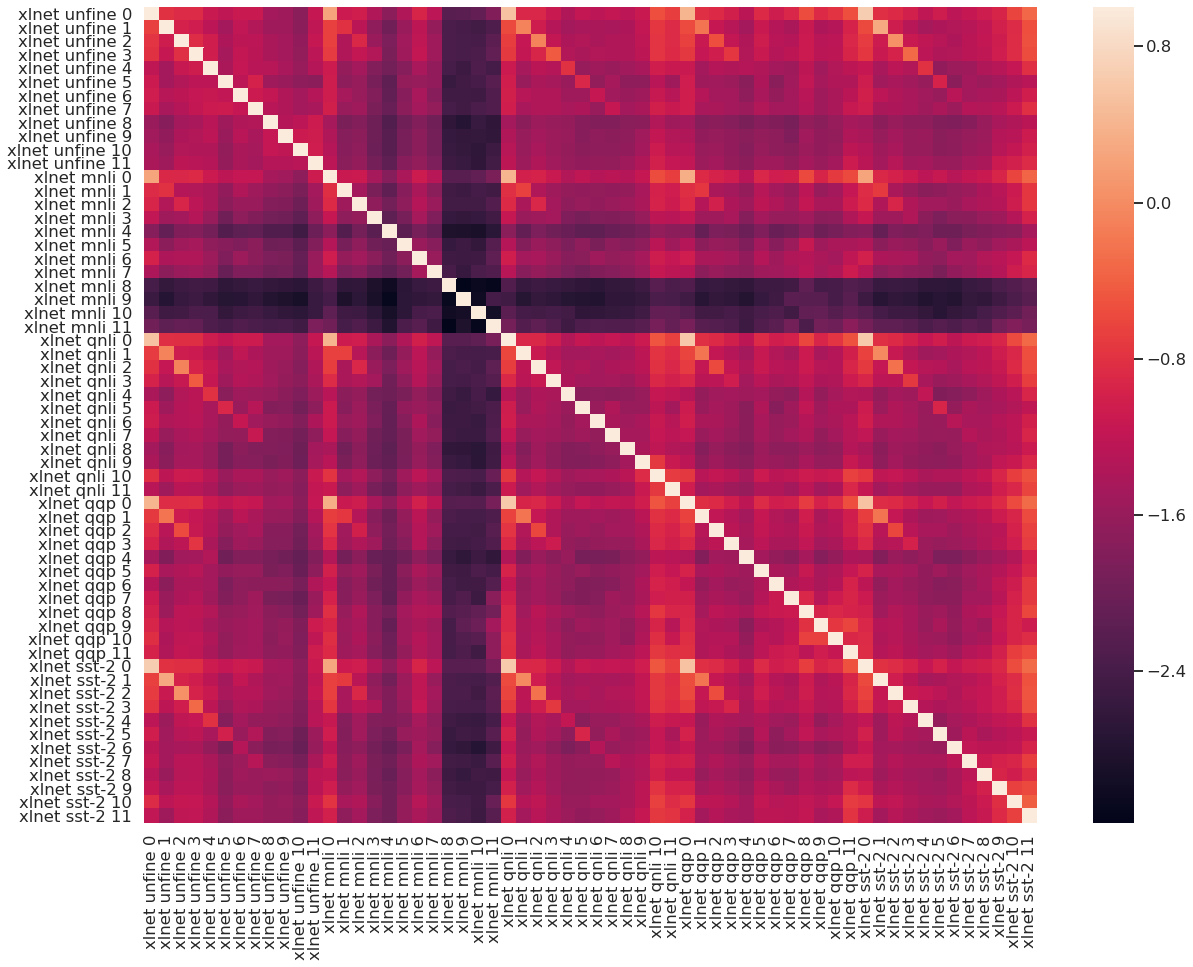

In [15]:
g = sns.heatmap(mincorr_df.fillna(1), xticklabels=short_labels, yticklabels=short_labels) #, vmin=0, vmax=1)
g.get_figure().savefig('xlnet-attn-mincorr-heatmap-finetuned.pdf')

### JSMaxCorr, JSMinCorr

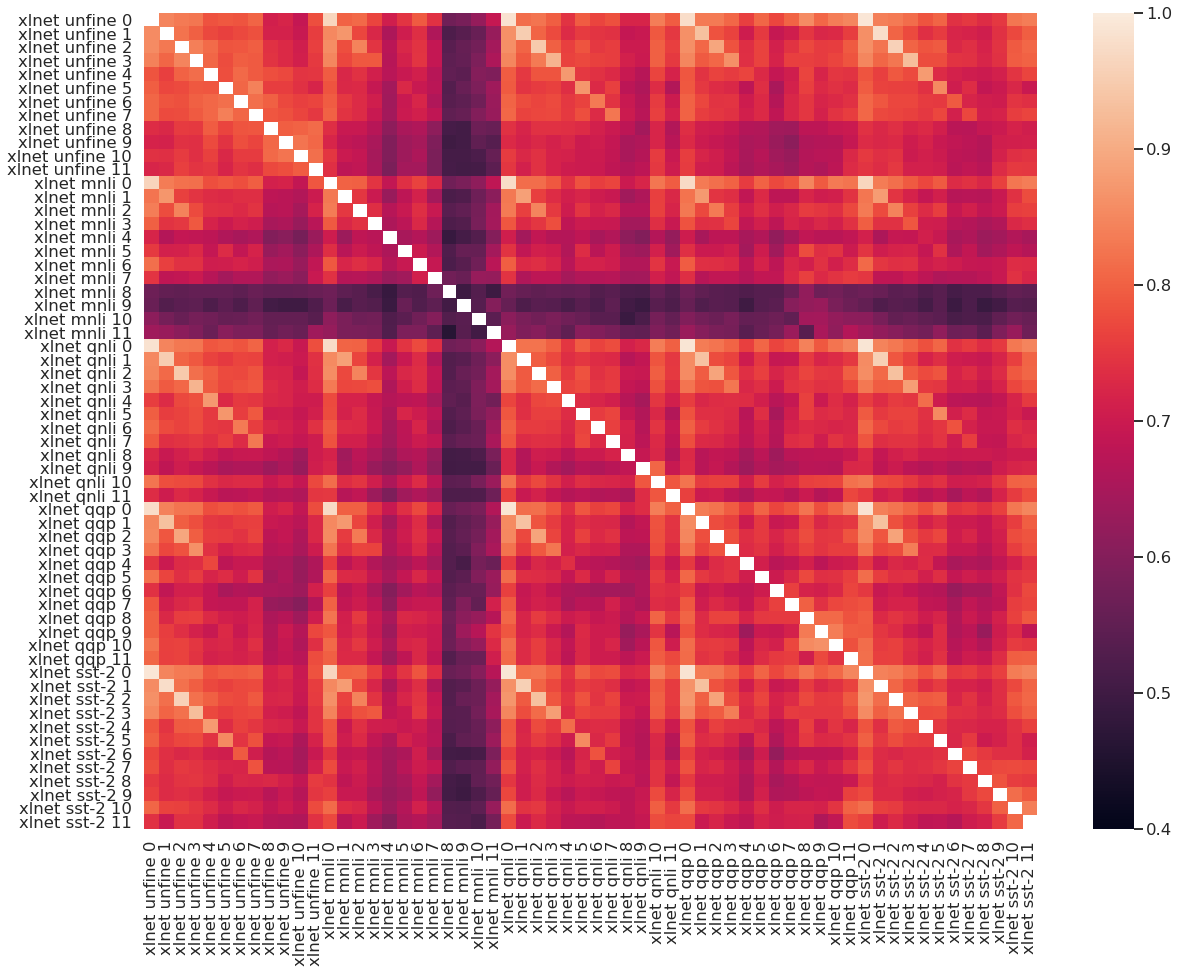

In [20]:
g = sns.heatmap(jsmaxcorr_df, xticklabels=short_labels, yticklabels=short_labels, vmin=0.4, vmax=1)
g.get_figure().savefig('xlnet-attn-jsmaxcorr-heatmap-finetuned.pdf')

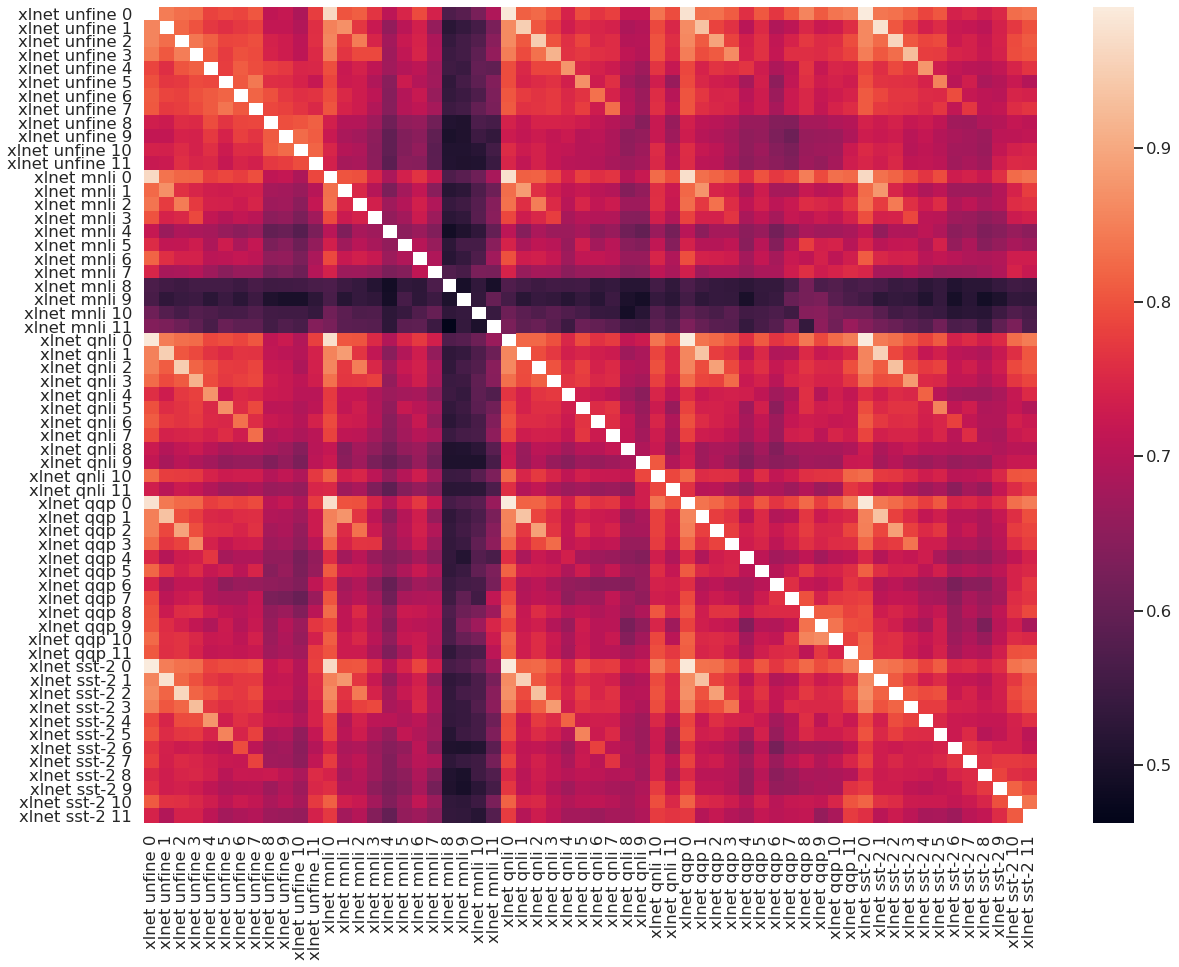

In [17]:
g = sns.heatmap(jsmincorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('xlnet-attn-jsmincorr-heatmap-finetuned.pdf')

### PearsonMaxCorr, PearsonMinCorr

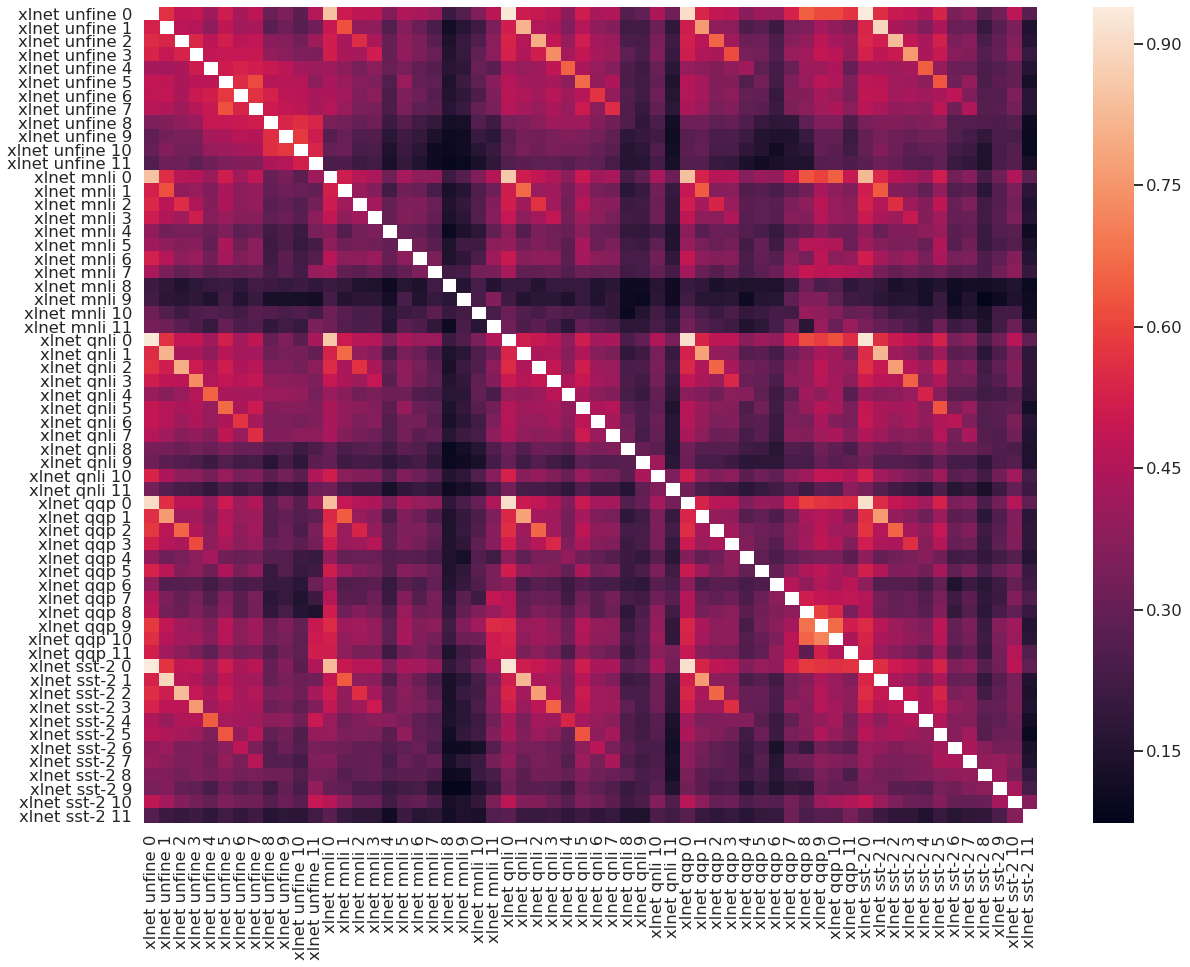

In [18]:
g = sns.heatmap(pearsonmaxcorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('xlnet-attn-pearsonmaxcorr-heatmap-finetuned.pdf')

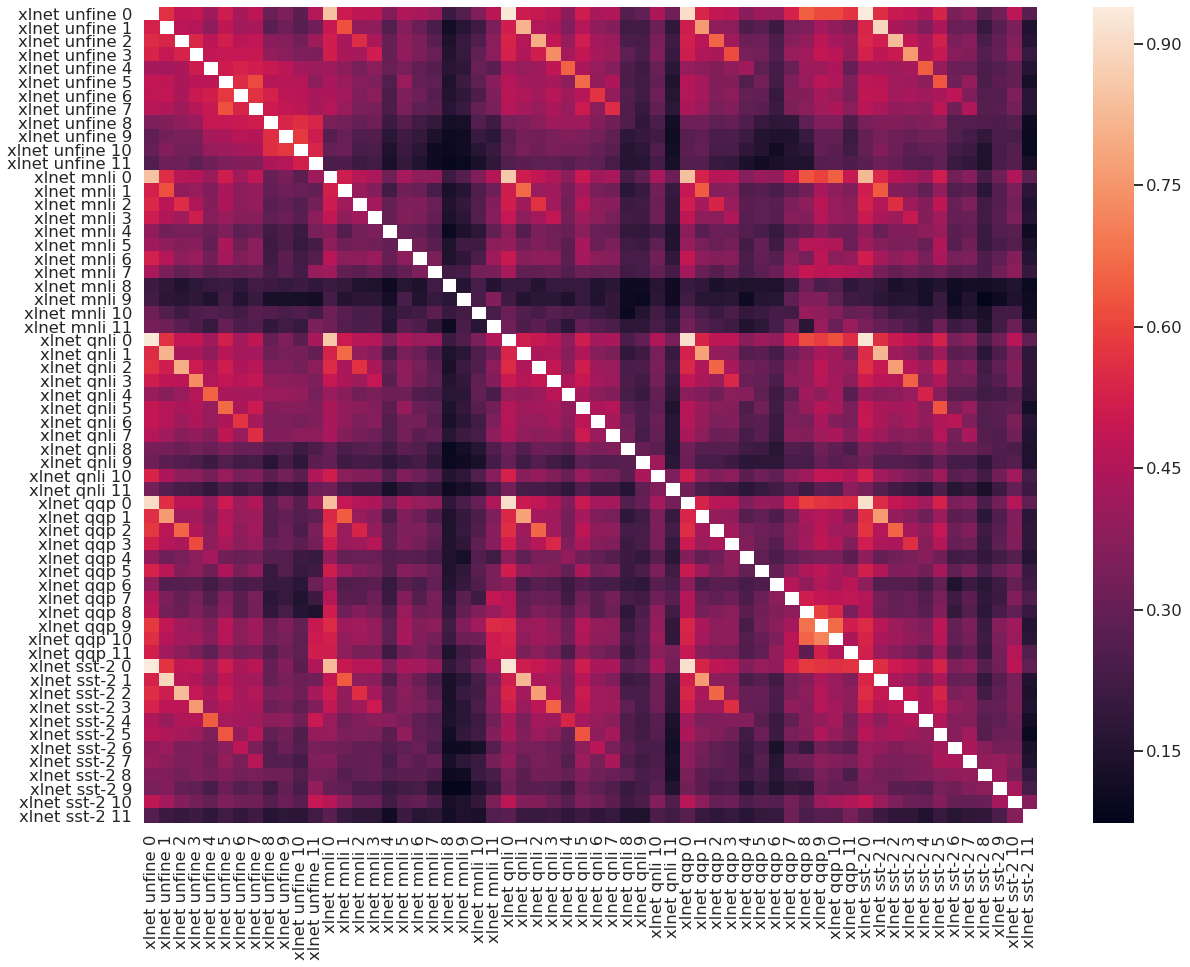

In [19]:
g = sns.heatmap(pearsonmincorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('xlnet-attn-pearsonmincorr-heatmap-finetuned.pdf')